In [1]:
!pip install SQLAlchemy
!pip install psycopg2

In [2]:
# import dependencies
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import psycopg2
import seaborn as sns
from matplotlib import rc
import matplotlib

In [3]:
# engine = create_engine('postgresql://localhost:5432/<EmployeeSQL>')
# connection = engine.connect()

conn = psycopg2.connect("dbname=EmployeeSQL user=postgres password=postgres host=localhost")
cursor = conn.cursor()
cursor

<cursor object at 0x000001569AC6DC80; closed: 0>

### Histogram showing to visualize the most common salary ranges for employees

In [4]:
# First Let's Inspect our data
salaries_data = pd.read_sql("SELECT * FROM salaries", conn)
salaries_data

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [5]:
# let's check if table is clean
salaries_data.count()


emp_no    300024
salary    300024
dtype: int64

In [6]:
# let s have an overview of salary frequency
salaries_data['salary'].value_counts()

40000    95346
55581       19
53738       18
53078       18
47454       17
         ...  
74239        1
78148        1
76103        1
79114        1
81762        1
Name: salary, Length: 50355, dtype: int64

In [7]:
# let s put salary column into a list
S= salaries_data['salary'].to_list()
S

[60117,
 65828,
 40006,
 40054,
 78228,
 40000,
 56724,
 46671,
 60929,
 72488,
 42365,
 40000,
 40000,
 46168,
 40000,
 70889,
 71380,
 55881,
 44276,
 40000,
 55025,
 40000,
 47883,
 83733,
 40000,
 47585,
 40000,
 48859,
 63163,
 66956,
 40000,
 48426,
 51258,
 47561,
 41538,
 42819,
 40000,
 40000,
 40000,
 52153,
 56893,
 81662,
 49324,
 40919,
 41971,
 40000,
 54982,
 40000,
 40000,
 74366,
 48817,
 57212,
 67854,
 40000,
 80024,
 48857,
 49616,
 52787,
 71218,
 74686,
 68577,
 55685,
 40000,
 40000,
 40000,
 69736,
 44642,
 87964,
 67932,
 55999,
 40000,
 40000,
 56473,
 61714,
 43815,
 47319,
 40000,
 47280,
 53492,
 54916,
 55786,
 48935,
 40000,
 69811,
 40000,
 81613,
 96750,
 65957,
 56469,
 44978,
 40000,
 53977,
 67856,
 58001,
 63668,
 61395,
 44886,
 40000,
 68781,
 54398,
 66591,
 44380,
 68158,
 45312,
 59258,
 62928,
 93159,
 40000,
 40000,
 46836,
 40000,
 49500,
 69856,
 49593,
 40000,
 44034,
 52284,
 40000,
 53551,
 46292,
 43772,
 42284,
 71524,
 40583,
 58249,


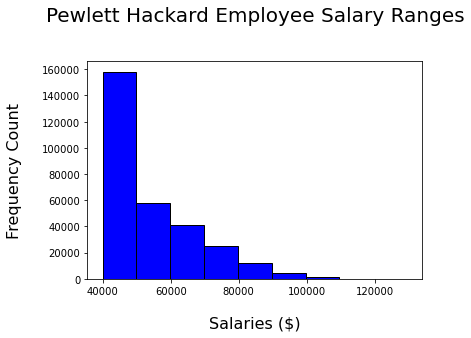

In [8]:
#let s plot the histogram
plt.hist(S, bins=9,color='blue',alpha=1,edgecolor='black')
plt.title('Pewlett Hackard Employee Salary Ranges',fontsize=20,pad=40)
plt.xlabel('Salaries ($)',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency Count',fontsize=16,color='black',labelpad=20)

plt.show()

### Visualization of Average Salary by Title through Bar chart

In [9]:
# let s pull employee data
employees_data = pd.read_sql("SELECT * FROM employees", conn)
employees_data

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
...,...,...,...,...,...,...,...
300019,464231,s0001,1958-08-14,Constantino,Eastman,M,1988-10-28
300020,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26
300021,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24
300022,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08


In [10]:
#let s combine employee data and salary data
first_merge = pd.merge(salaries_data, employees_data, on="emp_no", how="inner")
first_merge

,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...,...,...
300019,499995,40000,e0002,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,58058,e0003,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,49597,e0003,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,40000,s0001,1956-09-05,Patricia,Breugel,M,1993-10-13


In [11]:
#let s pull Title data
titles_data = pd.read_sql("SELECT * FROM titles", conn)
titles_data

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [12]:
# rename column "title_id" to "emp_title_id" so we can create a relation
new_titles_data = titles_data.rename(columns={'title_id': 'emp_title_id'})
new_titles_data

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [13]:
# we can now merge employee, salary and title data
combined_data = pd.merge(first_merge, new_titles_data, on="emp_title_id", how="inner")
combined_data

,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer
1,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer
2,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer
3,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer
4,10009,60929,e0003,1952-04-19,Sumant,Peac,F,1985-02-18,Senior Engineer
...,...,...,...,...,...,...,...,...,...
300019,111534,48077,m0001,1952-06-27,Hilary,Kambil,F,1988-01-31,Manager
300020,111692,40000,m0001,1954-10-05,Tonny,Butterworth,F,1985-01-01,Manager
300021,111784,40000,m0001,1956-06-14,Marjo,Giarratana,F,1988-02-12,Manager
300022,111877,53846,m0001,1962-10-18,Xiaobin,Spinelli,F,1991-08-17,Manager


In [14]:
# let's pull salary and title columns
final_data = combined_data[['salary', 'title']]
final_data

,salary,title
0,60117,Senior Engineer
1,40006,Senior Engineer
2,40054,Senior Engineer
3,40000,Senior Engineer
4,60929,Senior Engineer
...,...,...
300019,48077,Manager
300020,40000,Manager
300021,40000,Manager
300022,53846,Manager


In [15]:
# Groupby Title
grouped_df = final_data.groupby("title").mean()
grouped_df

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


In [16]:
# let's plot the bar chart
# Set x_axis, y_axis & Tick Locations
x_axis = grouped_df['title']
#ticks = np.arange(len(x_axis))
y_axis = grouped_df['salary']

# Create Bar Chart Based on Above Data
plt.bar(x_axis, y_axis, align="center", alpha=0.5)

# Set Labels & Title
plt.ylabel("Salaries ($)")
plt.xlabel("Employee Titles")
plt.title("Average Employee Salary by Title"



SyntaxError: unexpected EOF while parsing (<ipython-input-16-0c1c6fe39d44>, line 14)